In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

Q5 How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI. 10 Points

## Average Profit Expected from Selling
Data Type: Median Sale Price(Raw,SFR only,Monthly) 

Assumptions before calculation: 
Mortage interest rate is 7% of the purchase price

In [3]:
# Load the data
df= pd.read_csv("data/Metro_median_sale_price_uc_sfr_month.csv")

display(df.head(5))  
display(df.tail(5))
display(df.count())

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,167000.0,172800.0,174610.0,177000.0,182000.0,...,325000.0,325000.0,336500.0,349000.0,355000.0,365000.0,375000.0,367951.0,365000.0,359000.0
1,394913,1,"New York, NY",msa,NY,400000.0,395000.0,395000.0,400000.0,405000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,483000.0,487000.0,470000.0,455000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,224000.0,230000.0,239000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,138048.0,146680.0,145000.0,150000.0,156500.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
715,394418,880,"Brookings, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,400000.0,435000.0,422500.0,450000.0,432500.0,463500.0,465000.0
716,753914,908,"Port Lavaca, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128250.0
717,753925,910,"Vineyard Haven, MA",msa,MA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500000.0,1785000.0
718,394805,916,"Los Alamos, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,720000.0,627000.0,620000.0,581477.0,537000.0,568000.0,622500.0
719,395112,922,"Spirit Lake, IA",msa,IA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,366500.0,350000.0,365500.0,424500.0,406000.0,359750.0,494950.0


RegionID      720
SizeRank      720
RegionName    720
RegionType    720
StateName     719
             ... 
2024-05-31    710
2024-06-30    710
2024-07-31    713
2024-08-31    717
2024-09-30    720
Length: 205, dtype: int64

In [4]:
# List number of rows
print("Before: number of rows: ", df.shape)
 
# Drop the duplicates - (no duplicates found)
df = df.drop_duplicates()
print("After: number of rows: ", df.shape)
 
# Drop Missing/Null Values (no null values found)
print("Sum of null values: ", df.isnull().sum())

# Drop rows with NaN values
display(df.count())
df = df.dropna() 
display(df.count())

display(df.head(5))
display(df.tail(5))

Before: number of rows:  (720, 205)
After: number of rows:  (720, 205)
Sum of null values:  RegionID       0
SizeRank       0
RegionName     0
RegionType     0
StateName      1
              ..
2024-05-31    10
2024-06-30    10
2024-07-31     7
2024-08-31     3
2024-09-30     0
Length: 205, dtype: int64


RegionID      720
SizeRank      720
RegionName    720
RegionType    720
StateName     719
             ... 
2024-05-31    710
2024-06-30    710
2024-07-31    713
2024-08-31    717
2024-09-30    720
Length: 205, dtype: int64

RegionID      445
SizeRank      445
RegionName    445
RegionType    445
StateName     445
             ... 
2024-05-31    445
2024-06-30    445
2024-07-31    445
2024-08-31    445
2024-09-30    445
Length: 205, dtype: int64

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,394913,1,"New York, NY",msa,NY,400000.0,395000.0,395000.0,400000.0,405000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,483000.0,487000.0,470000.0,455000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,224000.0,230000.0,239000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,138048.0,146680.0,145000.0,150000.0,156500.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,395209,6,"Washington, DC",msa,VA,355000.0,347000.0,345000.0,350000.0,350000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
594,753889,645,"Hillsdale, MI",msa,MI,85900.0,82200.0,61950.0,77000.0,65000.0,...,124000.0,150000.0,161000.0,130000.0,199000.0,162000.0,187600.0,187500.0,175000.0,162550.0
611,394779,665,"Lawrenceburg, TN",msa,TN,73250.0,69419.0,57000.0,58750.0,78500.0,...,150000.0,199900.0,205000.0,212000.0,220000.0,193000.0,250000.0,219900.0,200000.0,236053.0
629,394845,690,"McMinnville, TN",msa,TN,63500.0,65000.0,64500.0,72500.0,61650.0,...,200000.0,230000.0,225900.0,225000.0,225000.0,234000.0,238750.0,226950.0,230000.0,252000.0
663,394745,744,"Kill Devil Hills, NC",msa,NC,302500.0,345000.0,327000.0,355000.0,355000.0,...,714500.0,655000.0,625000.0,615000.0,620000.0,680000.0,625000.0,657500.0,700000.0,660000.0
682,394786,783,"Lewisburg, TN",msa,TN,85850.0,107844.0,101267.0,85000.0,80000.0,...,330450.0,239900.0,348250.0,267000.0,312900.0,322500.0,345850.0,354200.0,285500.0,375000.0


In [5]:
# Rename column headers to snake_case and more appropriate terms
df = df.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name"})
                        
df.head(5)

# View a column to confirm the suspicion that the data is redundant/repeated or simply not needed
display(df['metro_area'].unique())

# Drop unnecessary columns
df = df.drop(["region_id", "size_rank", "region_type"], axis=1)
display(df.head(5))

array(['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX',
       'Washington, DC', 'Philadelphia, PA', 'Miami, FL', 'Atlanta, GA',
       'Boston, MA', 'Phoenix, AZ', 'San Francisco, CA', 'Riverside, CA',
       'Detroit, MI', 'Seattle, WA', 'Minneapolis, MN', 'San Diego, CA',
       'Tampa, FL', 'Denver, CO', 'Baltimore, MD', 'St. Louis, MO',
       'Orlando, FL', 'Charlotte, NC', 'San Antonio, TX', 'Portland, OR',
       'Sacramento, CA', 'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX',
       'Las Vegas, NV', 'Kansas City, MO', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids, MI',
       'Tucson, AZ', 'Urban Honolulu, HI', 'Tuls

,metro_area,state_name,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,"New York, NY",NY,400000.0,395000.0,395000.0,400000.0,405000.0,420000.0,417000.0,385000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,"Los Angeles, CA",CA,500000.0,483000.0,487000.0,470000.0,455000.0,437000.0,424500.0,395000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,"Chicago, IL",IL,215000.0,222000.0,224000.0,230000.0,239000.0,235000.0,235000.0,210000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,"Dallas, TX",TX,138048.0,146680.0,145000.0,150000.0,156500.0,154305.0,150000.0,140000.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,"Washington, DC",VA,355000.0,347000.0,345000.0,350000.0,350000.0,340000.0,325000.0,290000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


In [31]:
# Add a "Region" column

# Define the regions
northeast = ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"]
midwest = ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
south = ["AL", "AR", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
west = ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]

# Map states to regions
region_map = {}
region_map.update({state: "northeast" for state in northeast})
region_map.update({state: "midwest" for state in midwest})
region_map.update({state: "south" for state in south})
region_map.update({state: "west" for state in west})

display(region_map)

# Add the Region column
df.insert(2, "region", df["state_name"].map(region_map))

df.head(5)


{'CT': 'northeast',
 'ME': 'northeast',
 'MA': 'northeast',
 'NH': 'northeast',
 'RI': 'northeast',
 'VT': 'northeast',
 'NJ': 'northeast',
 'NY': 'northeast',
 'PA': 'northeast',
 'IL': 'midwest',
 'IN': 'midwest',
 'IA': 'midwest',
 'KS': 'midwest',
 'MI': 'midwest',
 'MN': 'midwest',
 'MO': 'midwest',
 'NE': 'midwest',
 'ND': 'midwest',
 'OH': 'midwest',
 'SD': 'midwest',
 'WI': 'midwest',
 'AL': 'south',
 'AR': 'south',
 'DE': 'south',
 'FL': 'south',
 'GA': 'south',
 'KY': 'south',
 'LA': 'south',
 'MD': 'south',
 'MS': 'south',
 'NC': 'south',
 'OK': 'south',
 'SC': 'south',
 'TN': 'south',
 'TX': 'south',
 'VA': 'south',
 'WV': 'south',
 'AK': 'west',
 'AZ': 'west',
 'CA': 'west',
 'CO': 'west',
 'HI': 'west',
 'ID': 'west',
 'MT': 'west',
 'NV': 'west',
 'NM': 'west',
 'OR': 'west',
 'UT': 'west',
 'WA': 'west',
 'WY': 'west'}

,metro_area,state_name,region,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,sale_income,ROI
1,"New York, NY",NY,northeast,413500.0,410000.0,410500.0,420000.0,423051.0,407500.0,415500.0,...,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0,251500.0,0.503012
2,"Los Angeles, CA",CA,west,685500.0,680000.0,680000.0,691000.0,685000.0,705000.0,725000.0,...,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0,246000.0,0.269965
3,"Chicago, IL",IL,midwest,234900.0,235000.0,235000.0,234000.0,227000.0,231000.0,253000.0,...,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0,90100.0,0.293054
4,"Dallas, TX",TX,south,262000.0,260000.0,259900.0,265000.0,256000.0,262000.0,270000.0,...,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0,123000.0,0.373332
6,"Washington, DC",VA,south,405000.0,415900.0,420000.0,420000.0,400000.0,419900.0,445000.0,...,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0,175000.0,0.338410


In [7]:
# Drop any column over 5 years old
df = df.drop(df.columns[2:-61], axis=1)
display(df.head(5))

,metro_area,state_name,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,"New York, NY",NY,413500.0,410000.0,410500.0,420000.0,423051.0,407500.0,415500.0,435000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,"Los Angeles, CA",CA,685500.0,680000.0,680000.0,691000.0,685000.0,705000.0,725000.0,700000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,"Chicago, IL",IL,234900.0,235000.0,235000.0,234000.0,227000.0,231000.0,253000.0,261500.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,"Dallas, TX",TX,262000.0,260000.0,259900.0,265000.0,256000.0,262000.0,270000.0,280000.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,"Washington, DC",VA,405000.0,415900.0,420000.0,420000.0,400000.0,419900.0,445000.0,460000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


In [8]:
display(df.tail(5))

,metro_area,state_name,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
594,"Hillsdale, MI",MI,116750.0,125000.0,112000.0,131250.0,132500.0,134950.0,115000.0,141500.0,...,124000.0,150000.0,161000.0,130000.0,199000.0,162000.0,187600.0,187500.0,175000.0,162550.0
611,"Lawrenceburg, TN",TN,98000.0,117800.0,118250.0,127500.0,147500.0,135555.0,130000.0,147500.0,...,150000.0,199900.0,205000.0,212000.0,220000.0,193000.0,250000.0,219900.0,200000.0,236053.0
629,"McMinnville, TN",TN,124950.0,142450.0,120000.0,119750.0,120000.0,135000.0,129000.0,137000.0,...,200000.0,230000.0,225900.0,225000.0,225000.0,234000.0,238750.0,226950.0,230000.0,252000.0
663,"Kill Devil Hills, NC",NC,337500.0,344500.0,362000.0,382000.0,356500.0,350000.0,364500.0,360000.0,...,714500.0,655000.0,625000.0,615000.0,620000.0,680000.0,625000.0,657500.0,700000.0,660000.0
682,"Lewisburg, TN",TN,145000.0,200000.0,170000.0,164950.0,136254.0,167000.0,183950.0,185000.0,...,330450.0,239900.0,348250.0,267000.0,312900.0,322500.0,345850.0,354200.0,285500.0,375000.0


In [9]:
#Calculate ROI (ROI = profit / amount invest)
df['sale_income'] = df ['2024-09-30'] - df['2019-09-30'] #sale_income = 2024_sale_price - 2022_sale_price
purchase_price = df['2019-09-30'] #Assume this is the date to purchase the house
mortage = purchase_price * 0.07
net_income = df ['sale_income'] - mortage
total_investment = purchase_price + mortage
df['ROI'] = net_income / total_investment
display (df.ROI)

1      0.503012
2      0.269965
3      0.293054
4      0.373332
6      0.338410
         ...   
594    0.301207
611    1.251125
629    0.884866
663    0.827622
682    1.417016
Name: ROI, Length: 445, dtype: float64

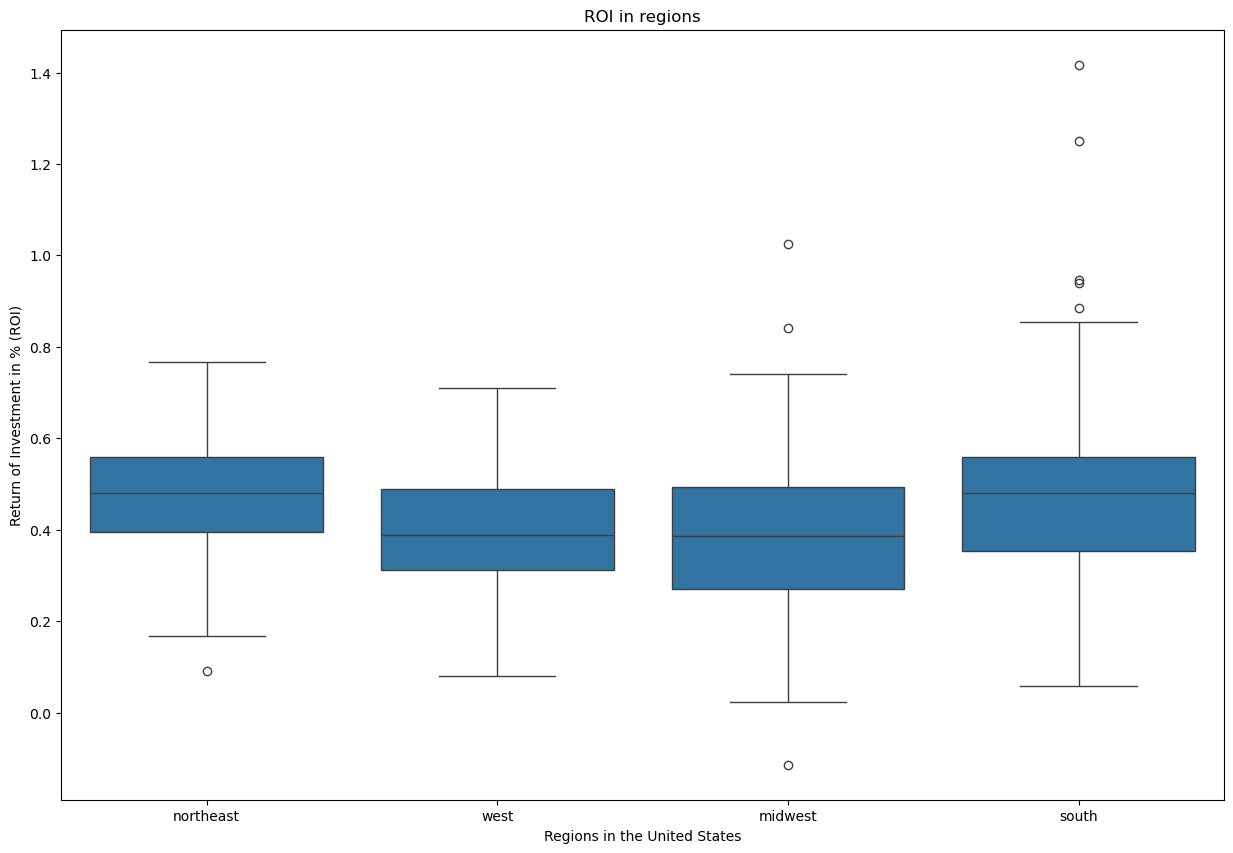

In [33]:
# Create box plots for ROI by region
fig, axes = plt.subplots(figsize=(15, 10))

sns.boxplot(x='region', y='ROI', data=df)
axes.set_title('ROI in regions')
axes.set_xlabel('Regions in the United States')
axes.set_ylabel('Return of Investment in % (ROI)')
plt.show()

## Conclusion for box plots:
Between Quarter 3 of 2019 to Quarter 3 of 2024 in the United States: 
- Northeast has the most return of investment
- South region ranks the second place with very close ROI to the Northeast
- Midwest ranks the last for ROI
- To invest and then sell, purchase houses in northeast and south get around 50% returns of investment in the past 5 years

In [ ]:
#Table for Top 20 ROI: 
pivot = df.pivot_table(index = ['state_name'],values = ['ROI'])
pivot = pivot.sort_values(by = 'ROI', ascending = True).head(20)
display(pivot)

#Chart for Top 20 ROI:
plt.subplot(1,4,1)
plt.barh(pivot.index,pivot['ROI'])
plt.title('Top 20 Most Worth Place to Invest between Third Quarter 2019 to Third Quarter 2024')
plt.xlabel('ROI',fontsize=12)
plt.ylabel('Regions',fontsize=12)

## Conclusion for bar chart:
Between Quarter 3 of 2019 to Quarter 3 of 2024 in the United States: 
- Top 20 return of investment in the US is between 18% - 41% 
- Among the states in Northeast, Massachusetts houses has the most return of investment

Conclusion for Average Selling Profit: 
Between Quarter 3 of 2019 to Quarter 3 of 2024 in the United States:  
1. Northest has the highest ROI, while Midwest has the lowest ROI for selling 
2. Masachusetts is the state with the highest ROI for selling in the nation
3. The top 20 ROI for selling in the US is between 18% to 41%

Q6: How much average monthly income I could expect from my investments in terms of lease/rent after upgrading properties, paying mortgage, and paying taxes. Calculate my ~ROI

## Average Monthly Income ROI
Data 1: ZORI(Smoothed): Single Family Residence Time Series($)
Data 2: Median Sale Price(Raw,SFR only,Monthly) 

In [39]:
# Load the Single Family Residence Time Data: 
df_rental = pd.read_csv('data/Metro_zori_uc_sfr_sm_month.csv')
display(df_rental.head(5))  
display(df_rental.tail(5))
display(df_rental.count())

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,1263.444318,1269.895092,1278.469237,1288.647487,1298.178017,...,2135.254699,2147.222455,2162.917331,2175.779343,2188.086209,2197.213557,2205.825071,2211.841814,2214.693266,2214.826710
1,394913,1,"New York, NY",msa,NY,2172.350813,2195.448862,2211.980362,2225.518207,2227.878842,...,3389.252812,3423.331146,3468.956765,3479.434471,3504.068770,3512.967752,3535.906708,3546.100645,3518.356703,3509.750205
2,753899,2,"Los Angeles, CA",msa,CA,2529.451523,2543.786170,2562.465252,2573.300077,2597.387056,...,4166.947559,4183.689748,4203.755348,4220.144971,4240.531898,4259.751366,4276.789066,4281.189374,4284.485193,4279.602359
3,394463,3,"Chicago, IL",msa,IL,1505.627017,1511.779272,1522.073950,1534.764157,1547.538133,...,2244.117798,2256.354170,2266.294085,2295.246104,2318.130388,2333.454844,2343.094047,2354.724901,2360.133093,2366.401698
4,394514,4,"Dallas, TX",msa,TX,1370.989564,1379.417484,1389.001222,1403.596165,1416.346007,...,2280.897967,2285.831609,2304.134514,2317.396859,2324.499356,2328.954287,2333.301355,2336.420733,2335.093773,2328.929081


,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
517,394615,847,"Fredericksburg, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2675.000000
518,753923,849,"The Dalles, OR",msa,OR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1740.102792,1778.803237,1835.966779,1941.666667
519,753921,867,"Steamboat Springs, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5562.963657,5104.611225,4785.778907,4536.559011,4611.274908,4656.828202,4622.833333
520,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,1094.005403,1069.62567,1058.636768,1072.369019,1100.772818,1136.945351,1136.186990,1128.202788,1118.693907,1123.888889
521,394805,916,"Los Alamos, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2634.324739,2750.000000


RegionID      522
SizeRank      522
RegionName    522
RegionType    522
StateName     521
             ... 
2024-06-30    442
2024-07-31    455
2024-08-31    466
2024-09-30    483
2024-10-31    522
Length: 123, dtype: int64

In [37]:
# List number of rows
print("Before: number of rows: ", df_rental.shape)
 
# Drop the duplicates - (no duplicates found)
df_rental = df_rental.drop_duplicates()
print("After: number of rows: ", df_rental.shape)
 
# Drop Missing/Null Values (no null values found)
print("Sum of null values: ", df_rental.isnull().sum())

# Drop rows with NaN values
display(df_rental.count())
df_rental = df_rental.dropna() 
display(df_rental.count())

display(df_rental.head(5))
display(df_rental.tail(5))

Before: number of rows:  (168, 120)
After: number of rows:  (168, 120)
Sum of null values:  metro_area    0
state_name    0
2015-01-31    0
2015-02-28    0
2015-03-31    0
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
Length: 120, dtype: int64


metro_area    168
state_name    168
2015-01-31    168
2015-02-28    168
2015-03-31    168
             ... 
2024-06-30    168
2024-07-31    168
2024-08-31    168
2024-09-30    168
2024-10-31    168
Length: 120, dtype: int64

metro_area    168
state_name    168
2015-01-31    168
2015-02-28    168
2015-03-31    168
             ... 
2024-06-30    168
2024-07-31    168
2024-08-31    168
2024-09-30    168
2024-10-31    168
Length: 120, dtype: int64

,metro_area,state_name,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
1,"New York, NY",NY,2172.350813,2195.448862,2211.980362,2225.518207,2227.878842,2244.158650,2249.784555,2250.106962,...,3389.252812,3423.331146,3468.956765,3479.434471,3504.068770,3512.967752,3535.906708,3546.100645,3518.356703,3509.750205
2,"Los Angeles, CA",CA,2529.451523,2543.786170,2562.465252,2573.300077,2597.387056,2616.032336,2637.634665,2648.906697,...,4166.947559,4183.689748,4203.755348,4220.144971,4240.531898,4259.751366,4276.789066,4281.189374,4284.485193,4279.602359
3,"Chicago, IL",IL,1505.627017,1511.779272,1522.073950,1534.764157,1547.538133,1556.765533,1558.184208,1557.713346,...,2244.117798,2256.354170,2266.294085,2295.246104,2318.130388,2333.454844,2343.094047,2354.724901,2360.133093,2366.401698
4,"Dallas, TX",TX,1370.989564,1379.417484,1389.001222,1403.596165,1416.346007,1427.186591,1435.273497,1438.956655,...,2280.897967,2285.831609,2304.134514,2317.396859,2324.499356,2328.954287,2333.301355,2336.420733,2335.093773,2328.929081
5,"Houston, TX",TX,1492.797146,1498.246621,1505.909295,1517.078518,1528.492786,1538.965848,1541.572916,1541.820917,...,2068.538636,2081.822525,2092.298563,2104.151103,2111.464305,2121.015668,2126.946470,2132.802905,2134.536004,2135.578001


,metro_area,state_name,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
301,"Winchester, VA",VA,1145.776587,1153.162526,1164.373918,1168.422721,1162.329486,1171.686681,1172.338732,1188.974452,...,1953.541383,1945.117885,1982.545419,1980.796761,2024.943078,2012.477605,2053.287946,2049.810927,2056.976348,2037.152778
313,"Manhattan, KS",KS,1098.990540,1099.689319,1103.371476,1102.054924,1105.422440,1112.187556,1110.444883,1113.691608,...,1331.858102,1327.249427,1341.716096,1341.478901,1357.192014,1368.966765,1391.326380,1396.869926,1397.747972,1385.842232
323,"Lawton, OK",OK,705.307577,704.138341,710.523548,709.337651,713.615888,711.177064,712.385314,712.397222,...,1028.806684,1054.191616,1058.888809,1055.043677,1059.004739,1079.286781,1078.384000,1086.909713,1087.883929,1101.883754
366,"Cheyenne, WY",WY,1186.886792,1188.676909,1211.724188,1217.124399,1214.192552,1191.550650,1197.146718,1195.333577,...,1724.470977,1744.161450,1740.605355,1751.330335,1778.063663,1792.656120,1792.539381,1774.081339,1775.017612,1780.456031
389,"Oak Harbor, WA",WA,1211.511572,1234.470612,1245.467722,1285.180681,1297.759311,1323.835849,1312.832787,1321.284982,...,2416.450227,2409.128380,2412.385991,2457.352131,2491.551026,2525.687512,2538.202551,2543.106779,2558.499234,2527.425926


In [43]:
# Rename column headers to snake_case and more appropriate terms
df_rental = df_rental.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name"})
                        
df_rental.head(5)

# View a column to confirm the suspicion that the data is redundant/repeated or simply not needed
display(df_rental['metro_area'].unique())

# Drop unnecessary columns
df_rental = df_rental.drop(["size_rank", "region_type"], axis=1)
display(df_rental.head(5))

array(['United States', 'New York, NY', 'Los Angeles, CA', 'Chicago, IL',
       'Dallas, TX', 'Houston, TX', 'Washington, DC', 'Philadelphia, PA',
       'Miami, FL', 'Atlanta, GA', 'Boston, MA', 'Phoenix, AZ',
       'San Francisco, CA', 'Riverside, CA', 'Detroit, MI', 'Seattle, WA',
       'Minneapolis, MN', 'San Diego, CA', 'Tampa, FL', 'Denver, CO',
       'Baltimore, MD', 'St. Louis, MO', 'Orlando, FL', 'Charlotte, NC',
       'San Antonio, TX', 'Portland, OR', 'Sacramento, CA',
       'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX', 'Las Vegas, NV',
       'Kansas City, MO', 'Columbus, OH', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids

,region_id,metro_area,state_name,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,United States,NaN,1263.444318,1269.895092,1278.469237,1288.647487,1298.178017,1306.990737,1312.940058,...,2135.254699,2147.222455,2162.917331,2175.779343,2188.086209,2197.213557,2205.825071,2211.841814,2214.693266,2214.826710
1,394913,"New York, NY",NY,2172.350813,2195.448862,2211.980362,2225.518207,2227.878842,2244.158650,2249.784555,...,3389.252812,3423.331146,3468.956765,3479.434471,3504.068770,3512.967752,3535.906708,3546.100645,3518.356703,3509.750205
2,753899,"Los Angeles, CA",CA,2529.451523,2543.786170,2562.465252,2573.300077,2597.387056,2616.032336,2637.634665,...,4166.947559,4183.689748,4203.755348,4220.144971,4240.531898,4259.751366,4276.789066,4281.189374,4284.485193,4279.602359
3,394463,"Chicago, IL",IL,1505.627017,1511.779272,1522.073950,1534.764157,1547.538133,1556.765533,1558.184208,...,2244.117798,2256.354170,2266.294085,2295.246104,2318.130388,2333.454844,2343.094047,2354.724901,2360.133093,2366.401698
4,394514,"Dallas, TX",TX,1370.989564,1379.417484,1389.001222,1403.596165,1416.346007,1427.186591,1435.273497,...,2280.897967,2285.831609,2304.134514,2317.396859,2324.499356,2328.954287,2333.301355,2336.420733,2335.093773,2328.929081


In [57]:
df_median_sale_price = pd.read_csv('data/Metro_median_sale_price_uc_sfr_month.csv')
df_median_sale_price.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,167000.0,172800.0,174610.0,177000.0,182000.0,...,325000.0,325000.0,336500.0,349000.0,355000.0,365000.0,375000.0,367951.0,365000.0,359000.0
1,394913,1,"New York, NY",msa,NY,400000.0,395000.0,395000.0,400000.0,405000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,483000.0,487000.0,470000.0,455000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,224000.0,230000.0,239000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,138048.0,146680.0,145000.0,150000.0,156500.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0


In [59]:
# List number of rows
print("Before: number of rows: ", df_median_sale_price.shape)
 
# Drop the duplicates - (no duplicates found)
df_median_sale_price = df_median_sale_price.drop_duplicates()
print("After: number of rows: ", df_median_sale_price.shape)
 
# Drop Missing/Null Values (no null values found)
print("Sum of null values: ", df_median_sale_price.isnull().sum())

# Drop rows with NaN values
display(df_median_sale_price.count())
df_median_sale_price = df_median_sale_price.dropna() 
display(df_median_sale_price.count())

display(df_median_sale_price.head(5))
display(df_median_sale_price.tail(5))

Before: number of rows:  (720, 205)
After: number of rows:  (720, 205)
Sum of null values:  RegionID       0
SizeRank       0
RegionName     0
RegionType     0
StateName      1
              ..
2024-05-31    10
2024-06-30    10
2024-07-31     7
2024-08-31     3
2024-09-30     0
Length: 205, dtype: int64


RegionID      720
SizeRank      720
RegionName    720
RegionType    720
StateName     719
             ... 
2024-05-31    710
2024-06-30    710
2024-07-31    713
2024-08-31    717
2024-09-30    720
Length: 205, dtype: int64

RegionID      445
SizeRank      445
RegionName    445
RegionType    445
StateName     445
             ... 
2024-05-31    445
2024-06-30    445
2024-07-31    445
2024-08-31    445
2024-09-30    445
Length: 205, dtype: int64

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,394913,1,"New York, NY",msa,NY,400000.0,395000.0,395000.0,400000.0,405000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,483000.0,487000.0,470000.0,455000.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,224000.0,230000.0,239000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,4,"Dallas, TX",msa,TX,138048.0,146680.0,145000.0,150000.0,156500.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,395209,6,"Washington, DC",msa,VA,355000.0,347000.0,345000.0,350000.0,350000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
594,753889,645,"Hillsdale, MI",msa,MI,85900.0,82200.0,61950.0,77000.0,65000.0,...,124000.0,150000.0,161000.0,130000.0,199000.0,162000.0,187600.0,187500.0,175000.0,162550.0
611,394779,665,"Lawrenceburg, TN",msa,TN,73250.0,69419.0,57000.0,58750.0,78500.0,...,150000.0,199900.0,205000.0,212000.0,220000.0,193000.0,250000.0,219900.0,200000.0,236053.0
629,394845,690,"McMinnville, TN",msa,TN,63500.0,65000.0,64500.0,72500.0,61650.0,...,200000.0,230000.0,225900.0,225000.0,225000.0,234000.0,238750.0,226950.0,230000.0,252000.0
663,394745,744,"Kill Devil Hills, NC",msa,NC,302500.0,345000.0,327000.0,355000.0,355000.0,...,714500.0,655000.0,625000.0,615000.0,620000.0,680000.0,625000.0,657500.0,700000.0,660000.0
682,394786,783,"Lewisburg, TN",msa,TN,85850.0,107844.0,101267.0,85000.0,80000.0,...,330450.0,239900.0,348250.0,267000.0,312900.0,322500.0,345850.0,354200.0,285500.0,375000.0


In [61]:
# Rename column headers to snake_case and more appropriate terms
df_median_sale_price = df_median_sale_price.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name"})
                        
df_median_sale_price.head(5)

# View a column to confirm the suspicion that the data is redundant/repeated or simply not needed
display(df_median_sale_price['metro_area'].unique())

# Drop unnecessary columns
df_median_sale_price = df_median_sale_price.drop(["size_rank", "region_type"], axis=1)
display(df_median_sale_price.head(5))

array(['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX',
       'Washington, DC', 'Philadelphia, PA', 'Miami, FL', 'Atlanta, GA',
       'Boston, MA', 'Phoenix, AZ', 'San Francisco, CA', 'Riverside, CA',
       'Detroit, MI', 'Seattle, WA', 'Minneapolis, MN', 'San Diego, CA',
       'Tampa, FL', 'Denver, CO', 'Baltimore, MD', 'St. Louis, MO',
       'Orlando, FL', 'Charlotte, NC', 'San Antonio, TX', 'Portland, OR',
       'Sacramento, CA', 'Pittsburgh, PA', 'Cincinnati, OH', 'Austin, TX',
       'Las Vegas, NV', 'Kansas City, MO', 'Indianapolis, IN',
       'Cleveland, OH', 'San Jose, CA', 'Nashville, TN',
       'Virginia Beach, VA', 'Providence, RI', 'Jacksonville, FL',
       'Milwaukee, WI', 'Oklahoma City, OK', 'Raleigh, NC', 'Memphis, TN',
       'Richmond, VA', 'Louisville, KY', 'New Orleans, LA',
       'Salt Lake City, UT', 'Hartford, CT', 'Buffalo, NY',
       'Birmingham, AL', 'Rochester, NY', 'Grand Rapids, MI',
       'Tucson, AZ', 'Urban Honolulu, HI', 'Tuls

,region_id,metro_area,state_name,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
1,394913,"New York, NY",NY,400000.0,395000.0,395000.0,400000.0,405000.0,420000.0,417000.0,...,600000.0,600000.0,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0
2,753899,"Los Angeles, CA",CA,500000.0,483000.0,487000.0,470000.0,455000.0,437000.0,424500.0,...,890000.0,885000.0,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0
3,394463,"Chicago, IL",IL,215000.0,222000.0,224000.0,230000.0,239000.0,235000.0,235000.0,...,285000.0,284900.0,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0
4,394514,"Dallas, TX",TX,138048.0,146680.0,145000.0,150000.0,156500.0,154305.0,150000.0,...,370000.0,370000.0,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0
6,395209,"Washington, DC",VA,355000.0,347000.0,345000.0,350000.0,350000.0,340000.0,325000.0,...,525001.0,510000.0,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0


In [71]:
# Drop any column over 5 years old
df_rental= df_rental.drop(df.columns[4:-61], axis=1)
display(df.head(5))

df_median_sale_price=df_median_sale_price.drop(df.columns[4:-61], axis=1)
display(df.head(5))

,metro_area,state_name,region,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,sale_income,ROI
1,"New York, NY",NY,northeast,413500.0,410000.0,410500.0,420000.0,423051.0,407500.0,415500.0,...,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0,251500.0,0.503012
2,"Los Angeles, CA",CA,west,685500.0,680000.0,680000.0,691000.0,685000.0,705000.0,725000.0,...,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0,246000.0,0.269965
3,"Chicago, IL",IL,midwest,234900.0,235000.0,235000.0,234000.0,227000.0,231000.0,253000.0,...,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0,90100.0,0.293054
4,"Dallas, TX",TX,south,262000.0,260000.0,259900.0,265000.0,256000.0,262000.0,270000.0,...,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0,123000.0,0.373332
6,"Washington, DC",VA,south,405000.0,415900.0,420000.0,420000.0,400000.0,419900.0,445000.0,...,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0,175000.0,0.338410


,metro_area,state_name,region,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,sale_income,ROI
1,"New York, NY",NY,northeast,413500.0,410000.0,410500.0,420000.0,423051.0,407500.0,415500.0,...,595000.0,600000.0,620000.0,645000.0,675000.0,675000.0,675000.0,665000.0,251500.0,0.503012
2,"Los Angeles, CA",CA,west,685500.0,680000.0,680000.0,691000.0,685000.0,705000.0,725000.0,...,940000.0,943000.0,970000.0,1000000.0,988000.0,975000.0,950000.0,931500.0,246000.0,0.269965
3,"Chicago, IL",IL,midwest,234900.0,235000.0,235000.0,234000.0,227000.0,231000.0,253000.0,...,290000.0,308000.0,320000.0,329000.0,344950.0,339900.0,325000.0,325000.0,90100.0,0.293054
4,"Dallas, TX",TX,south,262000.0,260000.0,259900.0,265000.0,256000.0,262000.0,270000.0,...,383000.0,395000.0,400000.0,407500.0,405000.0,400000.0,395000.0,385000.0,123000.0,0.373332
6,"Washington, DC",VA,south,405000.0,415900.0,420000.0,420000.0,400000.0,419900.0,445000.0,...,545000.0,580000.0,615000.0,625000.0,624000.0,610000.0,596500.0,580000.0,175000.0,0.338410


In [ ]:
# Use region_id to set index:
df_rental_dropped = df_rental_dropped.set_index('metro_area')
df_median_sale_price_dropped = df_median_sale_price_dropped.set_index('metro_area')

In [99]:
# Merge two dataframes: 
df_merged = pd.merge(df_rental.iloc[:,-1], df_median_sale_price.iloc[:,-1], left_index=True, right_index=True)
df_merged = pd.merge(df_rental.iloc[:,0], df_merged, left_index=True, right_index=True)

df_merged.rename(columns={df_merged.columns[0]: 'Metro_area', 
                          df_merged.columns[1]: 'Monthly_Rent', 
                          df_merged.columns[2]: 'Sale_price'}, inplace=True)
display(df_merged.head(5))

,Metro_area,Monthly_Rent,Sale_price


## Calculate ROI in Rental: 
Assumption: 
1. Downpayment: 20% of the sale price
2. Closing costs = $2500
3. Remodeling: 5% of the sale price
4. Mortage rate: 7%
5. taxes: increase 1% of the sale price every year
6. insurances:increase 1% of the sale price every year

In [105]:
def roi_cal(average_month_rent,avg_sale_price):
    downpayment = avg_sale_price * 0.2
    closing_costs = 2500
    remodeling = avg_sale_price * 0.05
    investment = downpayment + closing_costs + remodeling
    
    # Monthly Mortage Payment: 
    principle = avg_sale_price - downpayment
    interest_rate = 0.07
    r = interest_rate / 12 # monthly interest rate
    n = 360 #number of monthly payments
    
    mortage_payment = (principle * r * (1+r) **n) / ((1+r)**n - 1)

    # Monthly costs of insurance and property taxes:
    annual_insurance = avg_sale_price * 0.01
    annual_taxes = avg_sale_price * 0.01
    monthly_expenses = (annual_insurance + annual_taxes) /12

    monthly_cash_flow = avg_month_rent - mortage_payment - monthly_expenses
    annual_returen = monthly_cash_flow * 12

    #ROI for Rentals: 
    ROI = annual_return / investment
    return ROI 
    
display(roi_cal)


<function __main__.roi_cal(average_month_rent, avg_sale_price)>

In [111]:
def add_calculated_ROI_column(df): 
    df['ROI'] = df.apply(lambda row:calc_ROI(row[df.colunns[1]],row[df.columns[2]]),axis = 1)
    return df
    add_calculated_ROI_column(df_merged)
    df_merged = df_merged.sort_values(by='ROI',ascending = False)
    df_merged.head(20)
    display(add_calculated_ROI_column)




<function __main__.add_calculated_ROI_column(df)>